In [6]:
import numpy as np
import pandas as pd
import rdkit as rd
from rdkit import Chem
from rdkit.Chem import *
from rdkit.Chem import Descriptors
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from dscribe.descriptors import SOAP
import sparse
from dscribe.descriptors import SOAP
from dscribe.kernels import REMatchKernel, AverageKernel
import os
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin


In [3]:




solvents_smiles1 = [
    'CCCCCCO', # 1-hexanol
    'CCCCCCCCC=CCCCCCCCCO',  # Oleyl-Alcohol
    'CCCCOC(=O)C', # n-Butyl Acetate
    'CCCCC(CC)CO', # 2-Ethylhexanol
    'CCCCCCCCCCCCCCCC', # n-Hexadecane
    'CCCCCCCCCCCC', # Dodecane
    'CCCCCCCCCC', # n-Decane
    'CCCCCCCC', # n-Octane
]
solvents_smiles2 = [
    'CC(O)C',
    'CO',
    'CC(C)=O',
    'CC(C)O',
    'CCOC(=O)C',
    'CCCOCC',
    'CC1=CC=CC=C1',
    'CC#N',
    'CS(=O)C',
    'ClCCl',
    'CCCCCC',
    'CC1=CC=CC=C1',
    'CCC1=CC=CC=C1',
    'C1CCOC1',
    'CS(=O)C',
    'CC(Cl)Cl',
    'CCCCCC',
    'CCN(CC)CC',
    'CC(=O)O',
    'CC(=O)OC(C)=O',
    'C1CCCCC1',
    'C1COCCO1',
    'C1=CC=NC=C1',
    'CC(C)N(CC)CC',
    'CCCOC',
    'C1CCCO1',
    'CNN',
    'CN(C)C=O',
    'C1COCCO1',
    'C[N+](=O)[O-]',
    'C[S](=O)C',
    'C1COCCO1',
    'C1CCCCC1=O',
    'c1ccc(cc1)O',
    'CCOC(=O)C',
    'CC#N',
    'CCC1=CC=CC=C1',
    'CCN(CC)CC',
    'CCCO',
    'CCCCC(O)C',
    'CSC',
    'c1ccc(cc1)N',
    'CC1CCCO1',
    'CN(C)C=O',
    'CCCCOCC',
    'CC(Cl)Cl',
    'CC1=CC=CC=C1C',
    'c1ccccc1',
    'CC(C)(C)O',
    'C(CO)O',
    'CCCCCC',
    'C(CO)OCCO',
    'C[C+](C)(C)O',
    'CCCCCC',
    'C(C)(C)CC(C)O',
    'CCCCCC',
    'CC(C)(C)O',
    'CC1=CC=C(C=C1)C',
    'COC1=CC=CC=C1',
    'CC(C)(C)OC',
    'CCCCC',
    'CC1=CC(C)=CC(C)=C1',
    'CC1=CC=CC(C)=C1',
    'CC(C)(C)C1=CC=CC=C1',
    'CC1=CC(C)=CC=C1',
    'CC(C)C1=CC=CC=C1',
    'CC1=CC=C(C=C1)C',
    'COC1=CC=CC=C1',
    'CC(C)(C)C1=CC=CC=C1',
    'CCOCCO',
    'CCC(C)(C)C(=O)CC',
    'CCC1=CC=CC=C1',
    'CCOCCO',
    'CC(C)O',
    'CC(C)O',
    'CC(C)(C)OC',
    'CC1CCCO1',
    'CC(C)O',
    'CC(C)C1=CC=CC=C1',
    'CCCCC',
    'CC1=CC=CC=C1C',
    'c1ccc(cc1)O',
    'CCC(C)(C)C(=O)CC',
    'CC1CCCO1',
    'C1CCCCC1',
    'CC(C)(C)O',
    'CCOC(=O)C',
    'CC(C)=O',
    'CO',
    'C1COCCO1',
    'C1=CC=NC=C1',
    'c1ccc2c(c1)cccc2',
    'CCC1=CC=CC=C1',
    'CC1CCCO1',
]

solvents_smiles = solvents_smiles1 + solvents_smiles2 



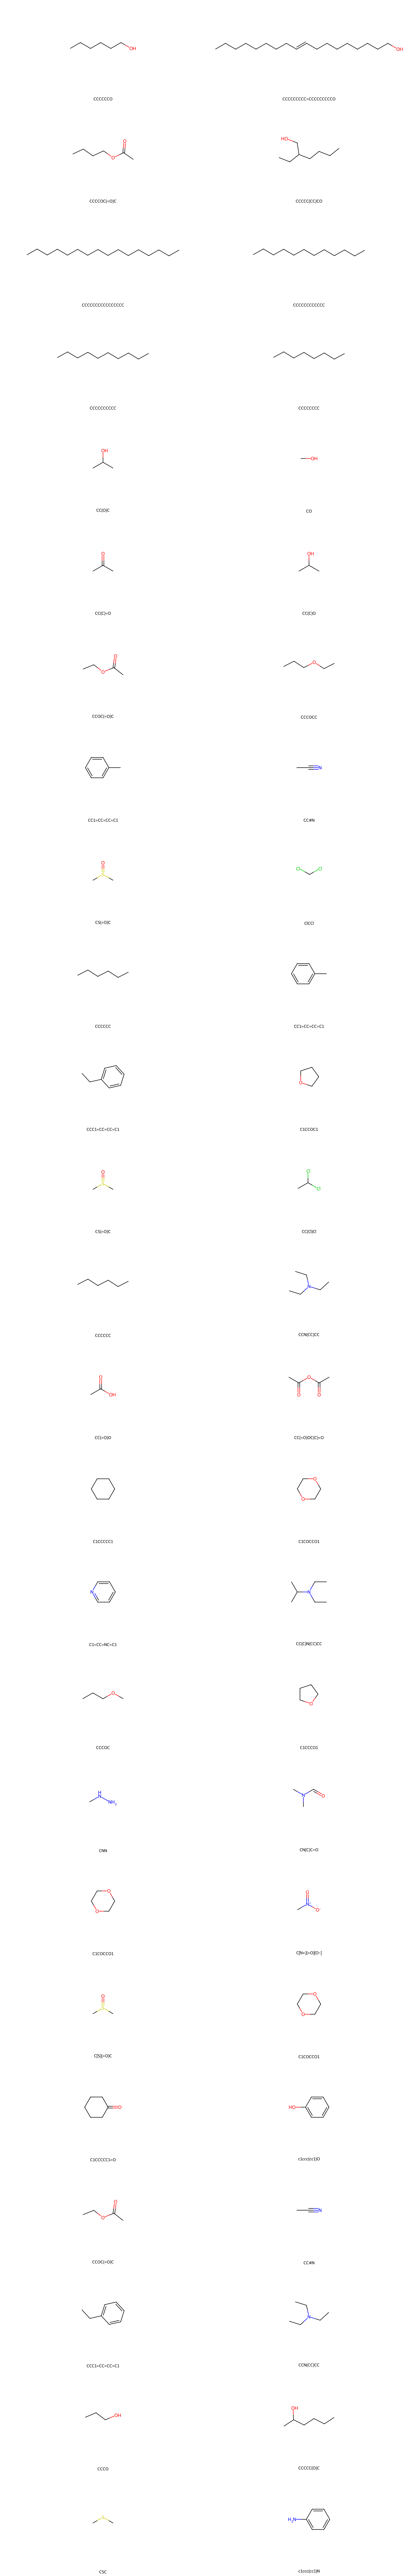

In [5]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(p) for p in solvents_smiles], 
                           molsPerRow=2, subImgSize=(800, 400),returnPNG=False, 
                           legends=[s for s in solvents_smiles] ) 
#img.save('match_substructure.png')
display( img )